# Social Media and Mental Health

Dataset used: /kaggle/input/social-media-and-mental-health/social_media_mental_health.csv

Can we predict high vs. low anxiety based on social media usage patterns?
→ Binary classification (Logistic Regression, Decision Tree).

Psychometrics:
GAD-7 (Generalized Anxiety Disorder): Scores 0-21. (Dependent variable)
PHQ_9_Score: (Depression score): Scores 0-27.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # visualisation plotting
import seaborn as sns # visualisation plotting

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/social-media-and-mental-health/social_media_mental_health.csv


In [3]:
# Load dataset into pandas

social_media_data_df = pd.read_csv('/kaggle/input/social-media-and-mental-health/social_media_mental_health.csv')

print("Rows:", len(social_media_data_df))
print("Columns:", social_media_data_df.shape[1])
social_media_data_df.head(15)

Rows: 8000
Columns: 15


,User_ID,Age,Gender,User_Archetype,Primary_Platform,Daily_Screen_Time_Hours,Dominant_Content_Type,Activity_Type,Late_Night_Usage,Social_Comparison_Trigger,Sleep_Duration_Hours,GAD_7_Score,GAD_7_Severity,PHQ_9_Score,PHQ_9_Severity
0,U-b23639d2,18,Male,Hyper-Connected,Twitter/X,8.50,Gaming,Active,0,0,3.9,9,Mild,5,Mild
1,U-e7778765,20,Male,Digital Minimalist,TikTok,0.50,Gaming,Active,0,0,5.5,0,Minimal,8,Mild
2,U-76749892,18,Female,Digital Minimalist,Snapchat,0.91,Gaming,Active,0,0,8.9,1,Minimal,3,None-Minimal
3,U-dcbbd7f9,18,Female,Hyper-Connected,Snapchat,7.43,Gaming,Active,1,0,6.2,13,Moderate,0,None-Minimal
4,U-9e1ba278,18,Male,Hyper-Connected,LinkedIn,4.94,Entertainment/Comedy,Active,1,0,5.3,13,Moderate,10,Moderate
5,U-e578c94a,18,Male,Digital Minimalist,YouTube,0.56,Entertainment/Comedy,Active,0,0,6.2,0,Minimal,2,None-Minimal
6,U-a04da6a8,20,Female,Hyper-Connected,Facebook,6.57,Lifestyle/Fashion,Active,1,0,4.7,15,Severe,12,Moderate
7,U-408fc499,18,Female,Hyper-Connected,Twitter/X,7.18,Lifestyle/Fashion,Active,0,0,4.8,6,Mild,5,Mild
8,U-90ce461c,18,Male,Passive Scroller,Facebook,3.41,Lifestyle/Fashion,Passive,0,0,7.0,5,Mild,4,None-Minimal
9,U-ee0c9c9b,20,Male,Average User,LinkedIn,1.97,Gaming,Active,0,0,4.6,5,Mild,3,None-Minimal


In [4]:
social_media_data_df.describe()

,Age,Daily_Screen_Time_Hours,Late_Night_Usage,Social_Comparison_Trigger,Sleep_Duration_Hours,GAD_7_Score,PHQ_9_Score
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,19.057875,4.277210,0.379375,0.103125,5.803237,7.354250,5.380125
std,1.117892,2.310486,0.485262,0.304141,1.344054,4.633108,4.816641
min,18.000000,0.500000,0.000000,0.000000,3.000000,0.000000,0.000000
25%,18.000000,2.420000,0.000000,0.000000,4.800000,4.000000,1.000000
50%,19.000000,4.270000,0.000000,0.000000,5.800000,7.000000,5.000000
75%,20.000000,6.050000,1.000000,0.000000,6.800000,11.000000,9.000000
max,22.000000,11.310000,1.000000,1.000000,11.600000,21.000000,23.000000


In [5]:
# check for missing values, check data types, columns in dataset
def column_glossary(data: pd.DataFrame, sample_n: int = 5) -> pd.DataFrame:
    rows = []
    for c in data.columns:
        s = data[c]
        rows.append(
            {
                "column": c,
                "dtype": str(s.dtype),
                "non_null": int(s.notna().sum()),
                "missing": int(s.isna().sum()),
                "unique": int(s.nunique(dropna=True)),
                "examples": ", ".join(map(str, s.dropna().astype(str).head(sample_n).tolist())),
            }
        )
    out = pd.DataFrame(rows).sort_values(["missing", "unique"], ascending=[False, True])
    return out

glossary = column_glossary(social_media_data_df)
glossary

,column,dtype,non_null,missing,unique,examples
2,Gender,object,8000,0,2,"Male, Male, Female, Female, Male"
7,Activity_Type,object,8000,0,2,"Active, Active, Active, Active, Active"
8,Late_Night_Usage,int64,8000,0,2,"0, 0, 0, 1, 1"
9,Social_Comparison_Trigger,int64,8000,0,2,"0, 0, 0, 0, 0"
3,User_Archetype,object,8000,0,4,"Hyper-Connected, Digital Minimalist, Digital M..."
12,GAD_7_Severity,object,8000,0,4,"Mild, Minimal, Minimal, Moderate, Moderate"
1,Age,int64,8000,0,5,"18, 20, 18, 18, 18"
14,PHQ_9_Severity,object,8000,0,5,"Mild, Mild, None-Minimal, None-Minimal, Moderate"
6,Dominant_Content_Type,object,8000,0,6,"Gaming, Gaming, Gaming, Gaming, Entertainment/..."
4,Primary_Platform,object,8000,0,7,"Twitter/X, TikTok, Snapchat, Snapchat, LinkedIn"


In [6]:
# check for missing or duplicate values
missing_value_count = social_media_data_df.isnull().sum().sum()
duplicate_row_count = len(social_media_data_df[social_media_data_df.duplicated() == True])
duplicate_users_count = len(social_media_data_df[social_media_data_df['User_ID'].duplicated() == True])

print(f'There are {missing_value_count} missing values')
print(f'There are {duplicate_row_count} duplicated values')
print(f'There are {duplicate_users_count} duplicate user values')

There are 0 missing values
There are 0 duplicated values
There are 0 duplicate user values


In [7]:
# Data balance check, get the percentage of values in dataset to ensure even representation

gender_count = social_media_data_df['Gender'].value_counts(normalize=True) * 100 
social_media_type = social_media_data_df['Primary_Platform'].value_counts(normalize=True) * 100
night_usage = social_media_data_df['Late_Night_Usage'].value_counts(normalize=True) * 100
user_type = social_media_data_df['User_Archetype'].value_counts(normalize=True) * 100
anxiety_level = social_media_data_df['GAD_7_Score'].value_counts(normalize=True) * 100
anxiety_severity = social_media_data_df['GAD_7_Severity'].value_counts(normalize=True) * 100

display(gender_count)
print('')
display(social_media_type)
print('')
display(night_usage)
print('')
display(user_type)
print('')
display(anxiety_level)
print('')
display(anxiety_severity)


Gender
Female    50.35
Male      49.65
Name: proportion, dtype: float64

Primary_Platform
TikTok       14.8125
Instagram    14.5625
Twitter/X    14.3375
YouTube      14.1750
LinkedIn     14.1500
Snapchat     14.0500
Facebook     13.9125
Name: proportion, dtype: float64

Late_Night_Usage
0    62.0625
1    37.9375
Name: proportion, dtype: float64

User_Archetype
Hyper-Connected       25.8500
Digital Minimalist    25.3750
Average User          24.9125
Passive Scroller      23.8625
Name: proportion, dtype: float64

GAD_7_Score
0     8.1500
8     7.3625
6     7.3375
5     7.2250
7     7.1625
9     7.0500
11    6.6375
10    6.5250
4     6.2250
3     6.1125
12    5.5750
2     5.3000
13    4.6125
1     4.4500
14    3.4625
15    2.7625
16    1.7375
17    0.9625
18    0.7500
19    0.3125
20    0.1750
21    0.1125
Name: proportion, dtype: float64

GAD_7_Severity
Mild        36.1375
Minimal     30.2375
Moderate    26.8125
Severe       6.8125
Name: proportion, dtype: float64

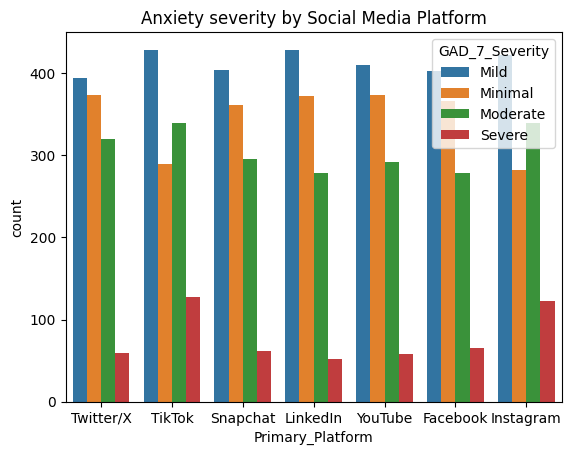

In [8]:
# data exploration/visualisation

# Show anxiety levels vs main social media platform used by users
sns.countplot(
    data=social_media_data_df,
    x='Primary_Platform',
    hue='GAD_7_Severity'
)

plt.title('Anxiety severity by Social Media Platform')
plt.show()

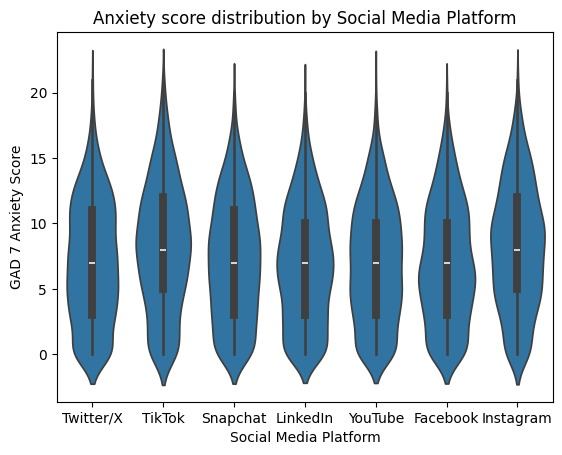

In [9]:
sns.violinplot(
    data=social_media_data_df,
    x='Primary_Platform',
    y='GAD_7_Score'
)

plt.ylabel('GAD 7 Anxiety Score')
plt.xlabel('Social Media Platform')
plt.title('Anxiety score distribution by Social Media Platform')
plt.show()

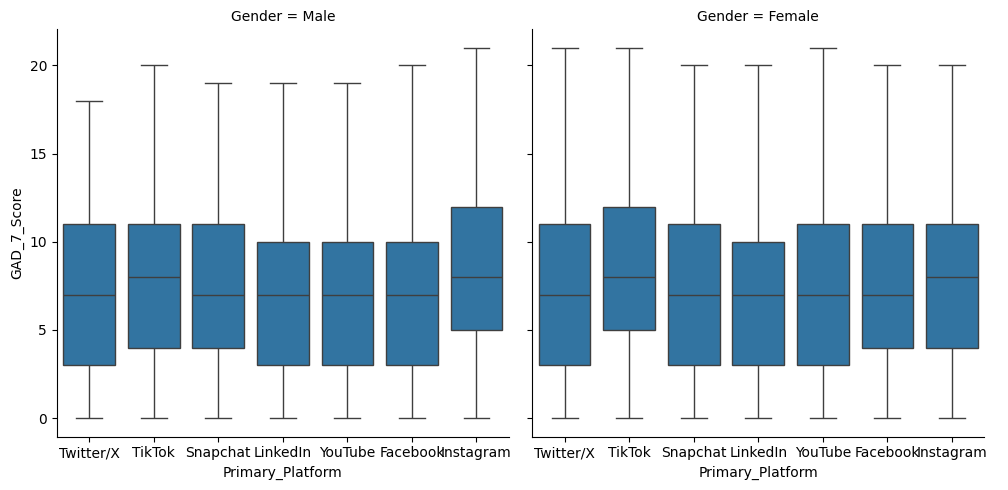

In [10]:

sns.catplot(
    data=social_media_data_df,
    x='Primary_Platform',
    y='GAD_7_Score',
    kind='box',
    col='Gender'
)


plt.show()

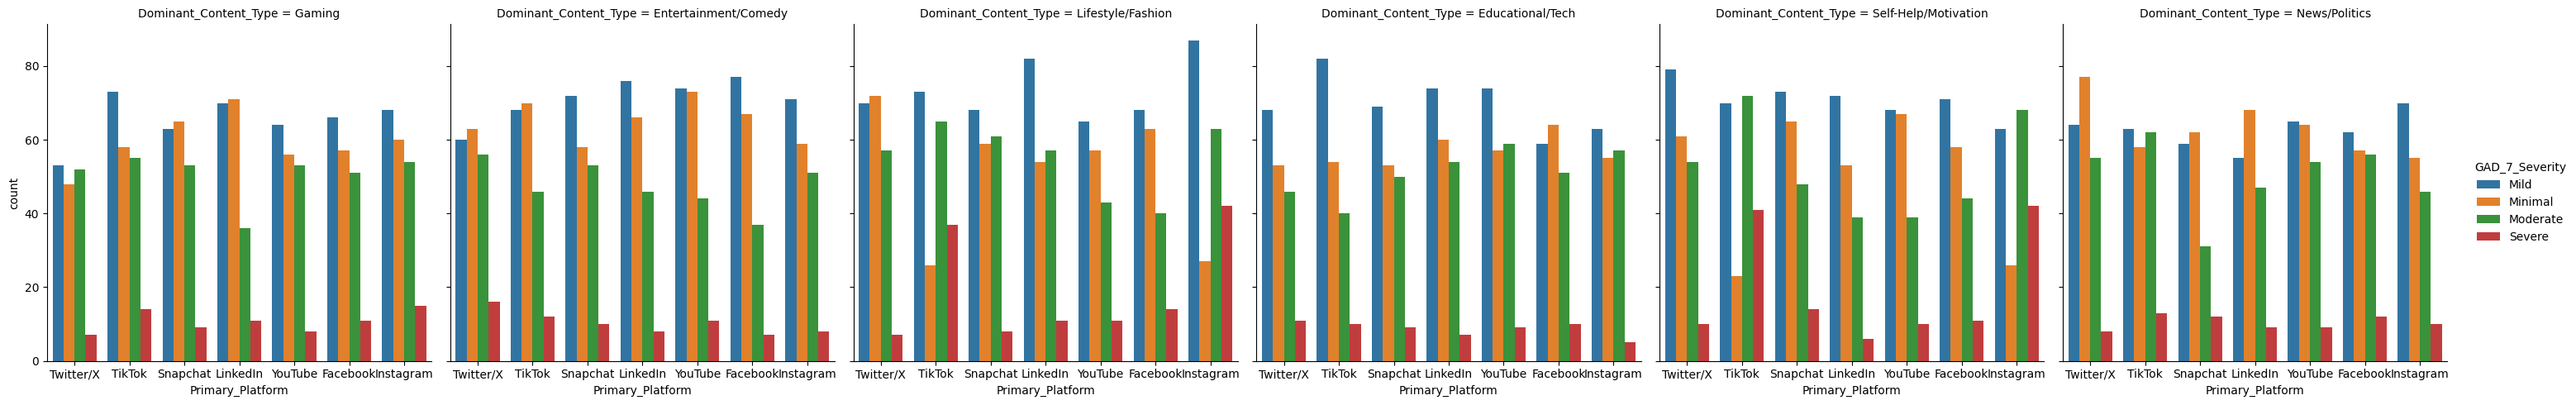

In [11]:
sns.catplot(
    data=social_media_data_df,
    x='Primary_Platform',
    hue='GAD_7_Severity',
    col='Dominant_Content_Type',
    kind='count'
)

plt.show()

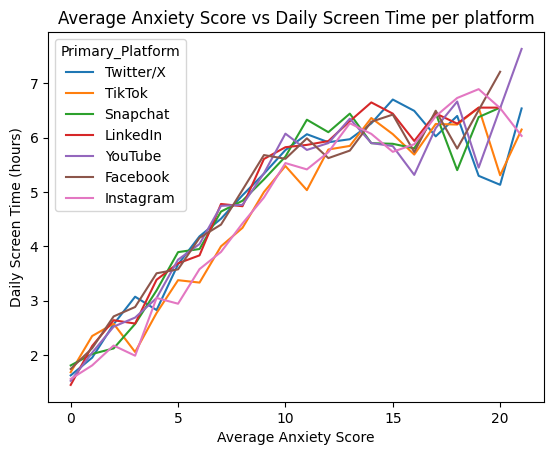

In [12]:
sns.lineplot(
    data=social_media_data_df,
    y='Daily_Screen_Time_Hours',
    x='GAD_7_Score',
    hue='Primary_Platform',
    estimator='mean',
    errorbar=None
)

plt.title('Average Anxiety Score vs Daily Screen Time per platform')
plt.ylabel('Daily Screen Time (hours)')
plt.xlabel('Average Anxiety Score')
plt.show()

Text(0.5, 0, 'Anxiety Severity')

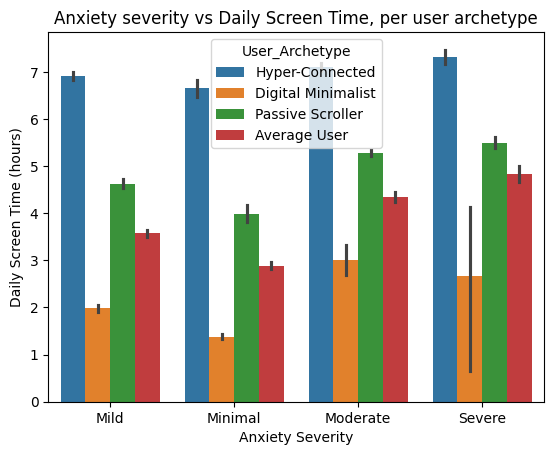

In [13]:
sns.barplot(
    data=social_media_data_df,
    y='Daily_Screen_Time_Hours',
    x ='GAD_7_Severity',
    hue='User_Archetype',
    #estimator='mean',
    #errorbar=None
)

plt.title('Anxiety severity vs Daily Screen Time, per user archetype')
plt.ylabel('Daily Screen Time (hours)')
plt.xlabel('Anxiety Severity')

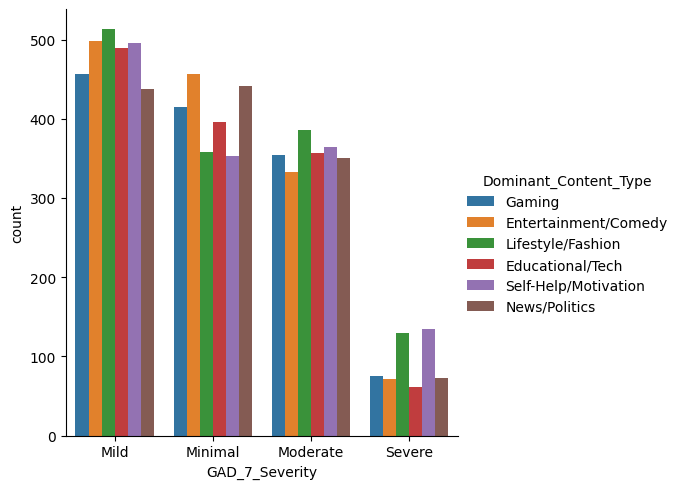

In [14]:
sns.catplot(
    data=social_media_data_df,
    x = 'GAD_7_Severity',
    hue = 'Dominant_Content_Type',
    kind='count'
)



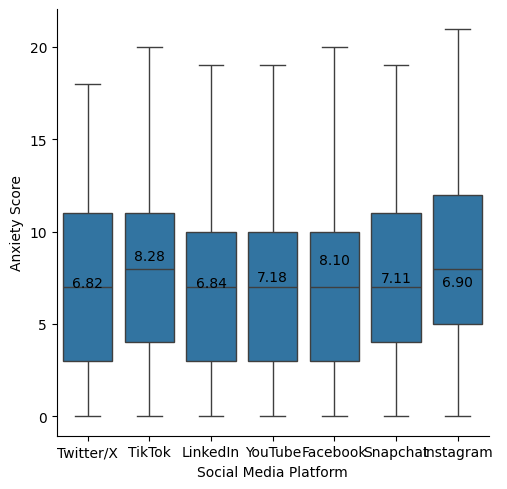

In [22]:
# Male User Anxiety Score Distributions per Their Dominant Social Media Platform
male_data = social_media_data_df[social_media_data_df.Gender == 'Male'].copy()

g = sns.catplot(
    data=social_media_data_df[social_media_data_df.Gender == 'Male'],
    x='Primary_Platform',
    y='GAD_7_Score',
    kind='box'
)

for ax in g.axes.flat:
    for x, y in enumerate(male_data.groupby("Primary_Platform")["GAD_7_Score"].mean()):
        ax.text(x, y, f"{y:.2f}", ha="center", va="bottom")

plt.ylabel('Anxiety Score')
plt.xlabel('Social Media Platform')
plt.show()

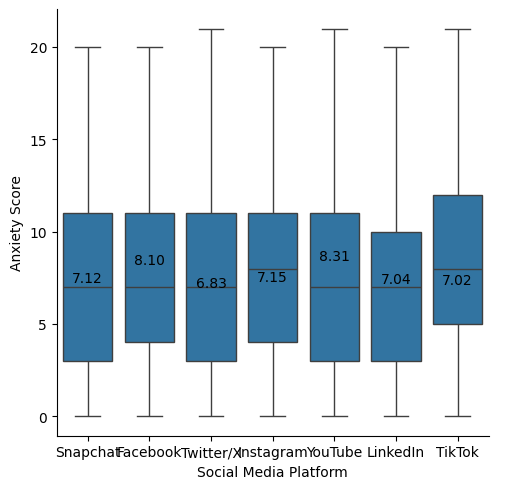

In [23]:
# Female User Anxiety Score Distributions per Their Dominant Social Media Platform
female_data = social_media_data_df[social_media_data_df.Gender == 'Female'].copy()

g = sns.catplot(
    data=social_media_data_df[social_media_data_df.Gender == 'Female'],
    x='Primary_Platform',
    y='GAD_7_Score',
    kind='box'
)

for ax in g.axes.flat:
    for x, y in enumerate(female_data.groupby("Primary_Platform")["GAD_7_Score"].mean()):
        ax.text(x, y, f"{y:.2f}", ha="center", va="bottom")

plt.ylabel('Anxiety Score')
plt.xlabel('Social Media Platform')
plt.show()